In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings   
warnings.filterwarnings("ignore")

In [3]:
pre = pd.read_csv("C:\\Users\\pvpar\\Downloads\\previous_application.csv")
curr = pd.read_csv("C:\\Users\\pvpar\\Downloads\\application_data.csv")

In [4]:
#change the display setting

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

## Indentify the missing data and use appropriate method to deal with it. (Remove columns/or replace it with an appropriate value)

In [5]:
print("shape of curr: ",curr.shape)
print("shape of pre: ",pre.shape)

shape of curr:  (307511, 122)
shape of pre:  (1670214, 37)


In [6]:
null_counts = curr.isnull().sum()
null_percentages = null_counts / len(curr)

# Select the columns with less than 40% null values
cols_to_keep = null_percentages[null_percentages < 0.4]

# Drop the columns with more than 50% null values
curr = curr.drop(labels=null_percentages[null_percentages >= 0.4].index, axis=1)

In [7]:
print("shape of curr: ",curr.shape)
print("shape of pre: ",pre.shape)

shape of curr:  (307511, 73)
shape of pre:  (1670214, 37)


## DATA SET 1

In [8]:
curr.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
O

In [9]:
curr.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
curr.columns[-6:]

Index(['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'], dtype='object')

In [11]:
curr_col=['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR','EXT_SOURCE_2', 
          'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 
          'OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE',
         'NAME_TYPE_SUITE']

In [12]:
for c in curr_col:
    curr[c]=curr[c].fillna(curr[c].mode()[0])

In [13]:
list_d=['AMT_ANNUITY','AMT_GOODS_PRICE']

for c in list_d:
    curr[c]=curr[c].fillna(curr[c].mean())

In [14]:
curr.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                    0
NAME_TYPE_SUITE                    0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
O

In [15]:
curr['OCCUPATION_TYPE'].unique()

array(['Laborers', 'Core staff', 'Accountants', 'Managers', nan,
       'Drivers', 'Sales staff', 'Cleaning staff', 'Cooking staff',
       'Private service staff', 'Medicine staff', 'Security staff',
       'High skill tech staff', 'Waiters/barmen staff',
       'Low-skill Laborers', 'Realty agents', 'Secretaries', 'IT staff',
       'HR staff'], dtype=object)

In [16]:
curr.dropna(inplace=True)

In [17]:
curr.shape

(211118, 73)

## Identify if there are outliers in the dataset. Also, mention why do you think it is an outlier. Again, remember that for this exercise, it is not necessary to remove any data points.

In [18]:
currNumFeaturesList=curr.select_dtypes(include=np.number).columns.tolist()

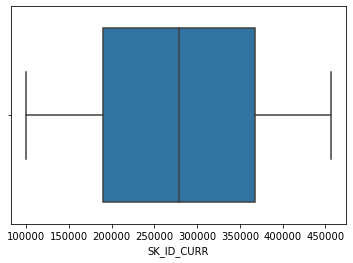

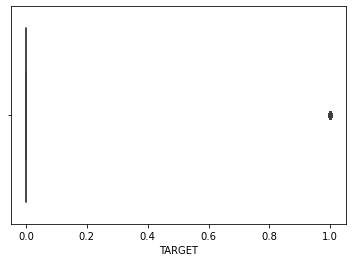

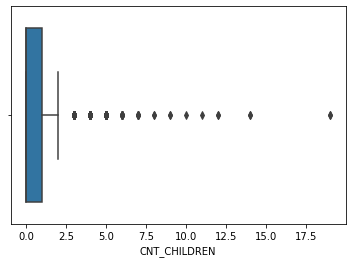

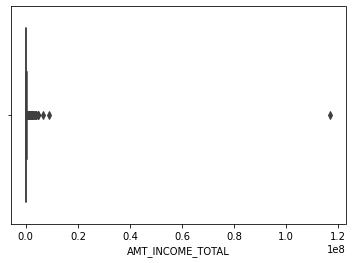

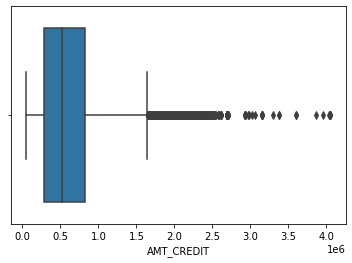

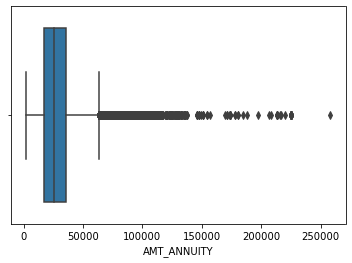

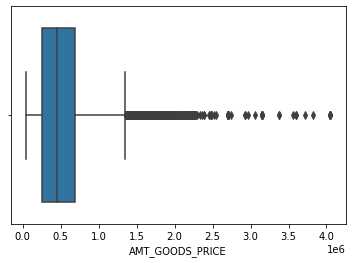

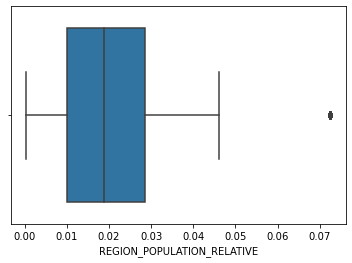

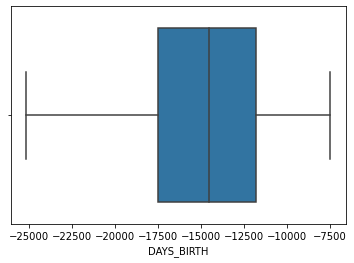

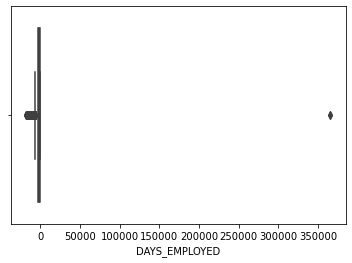

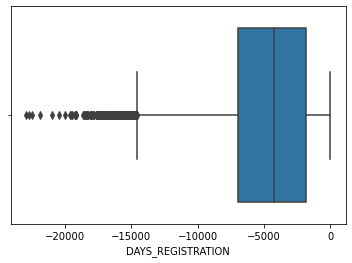

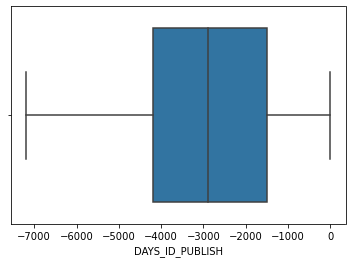

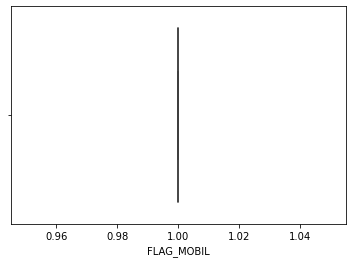

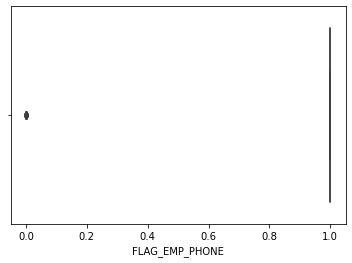

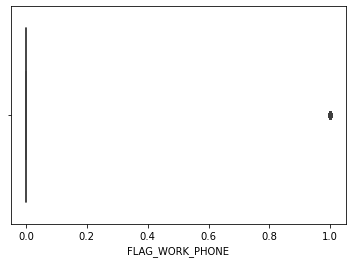

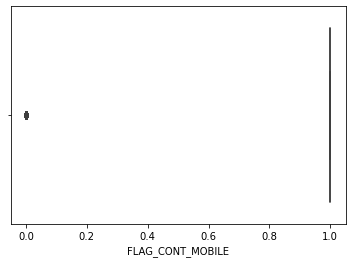

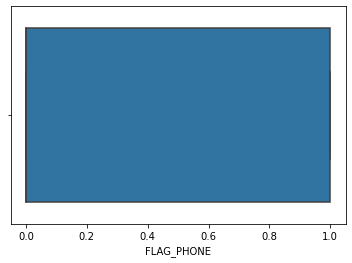

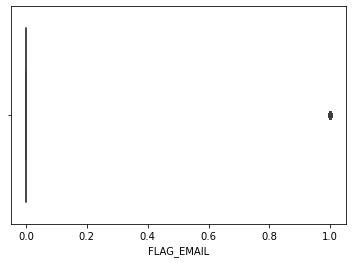

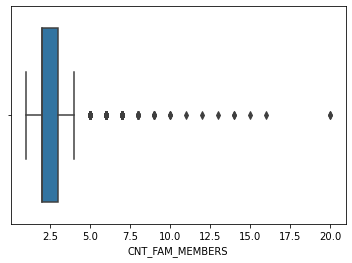

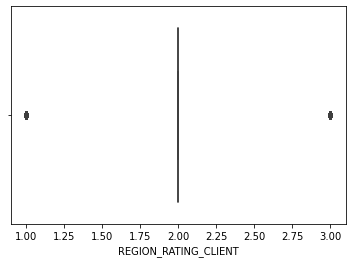

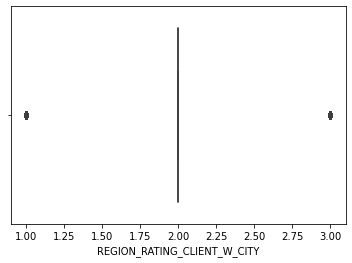

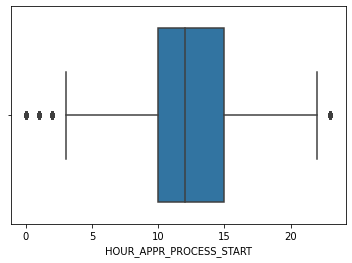

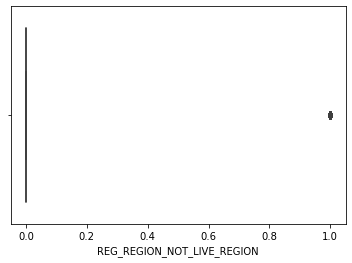

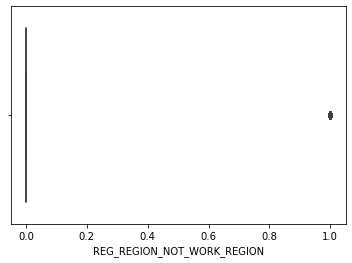

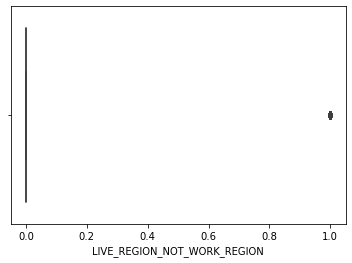

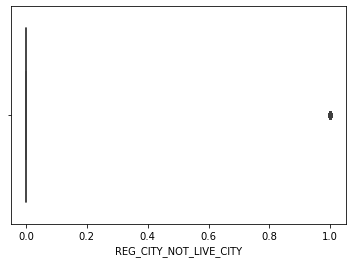

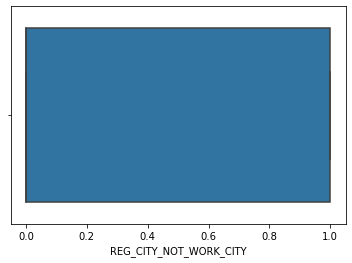

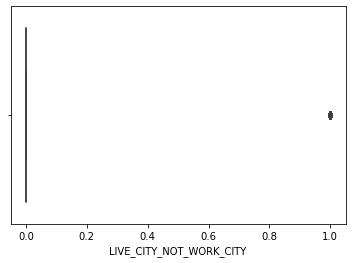

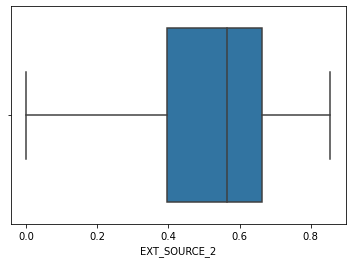

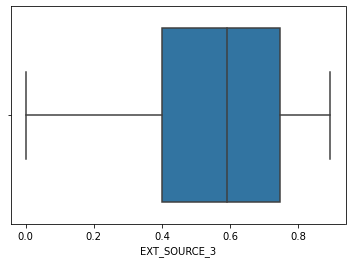

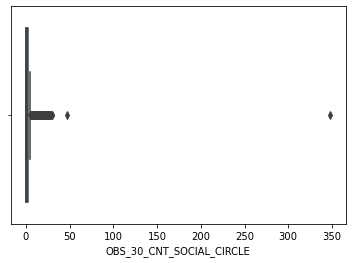

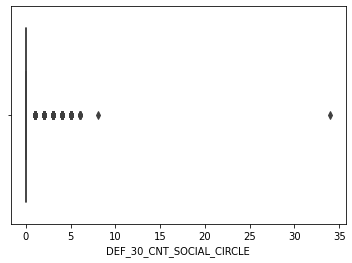

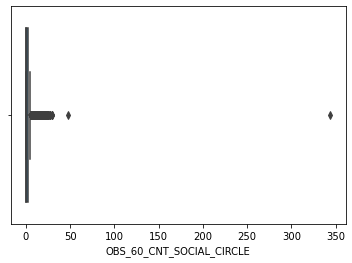

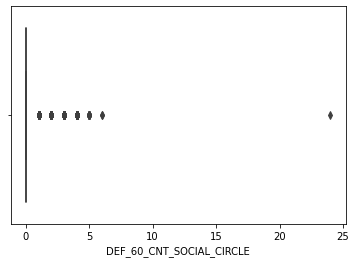

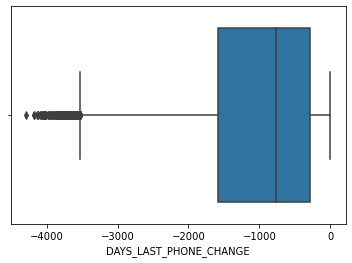

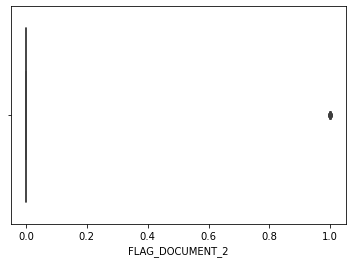

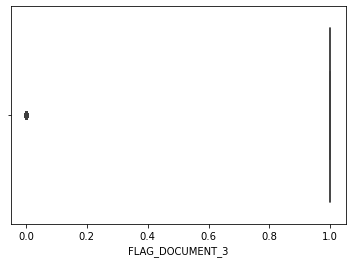

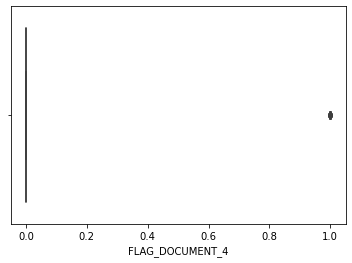

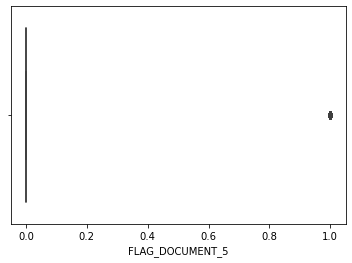

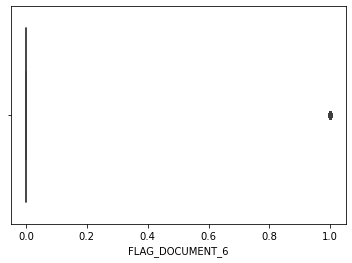

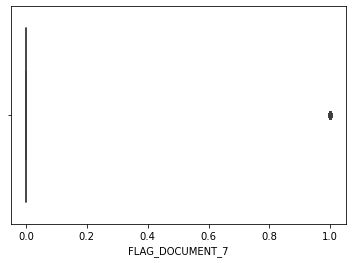

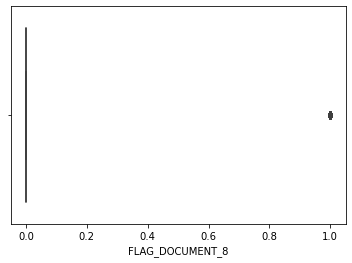

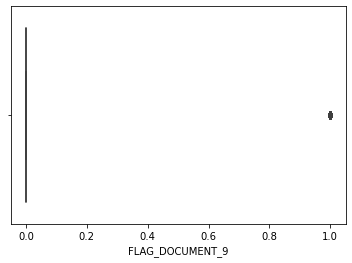

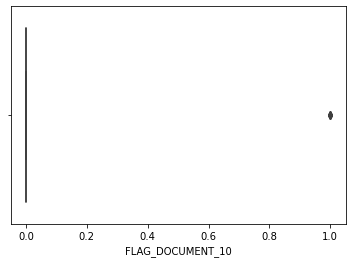

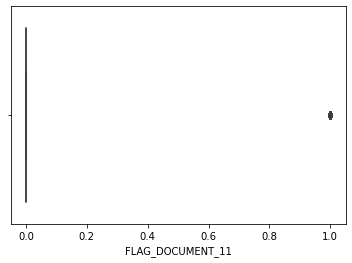

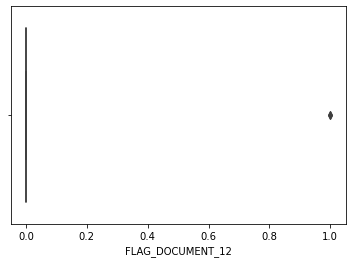

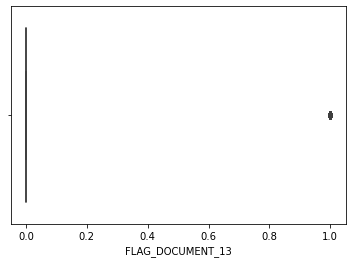

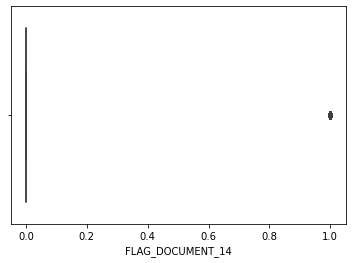

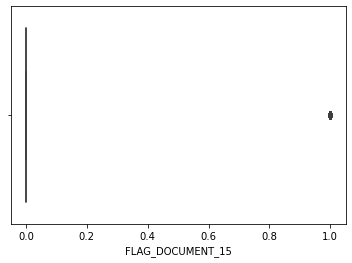

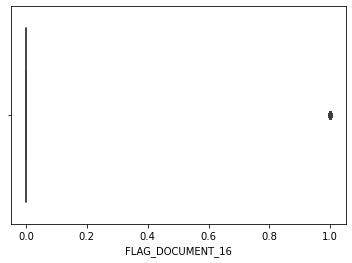

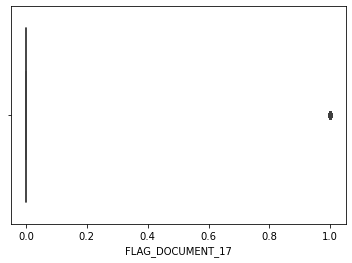

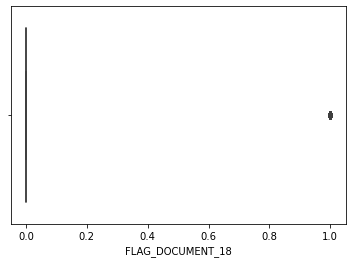

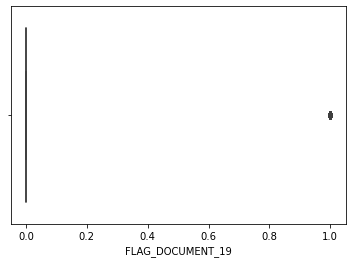

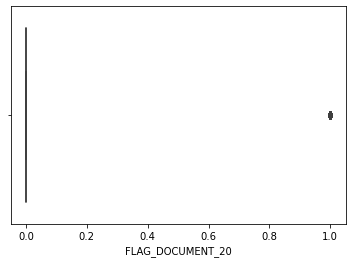

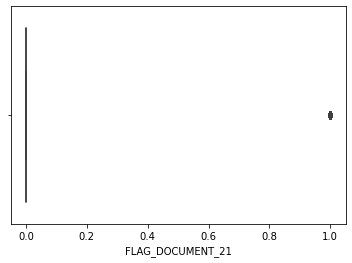

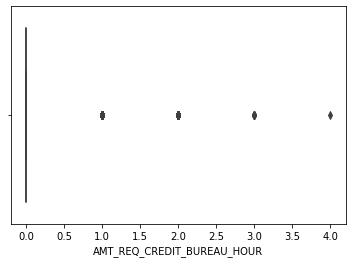

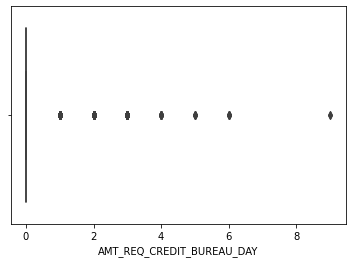

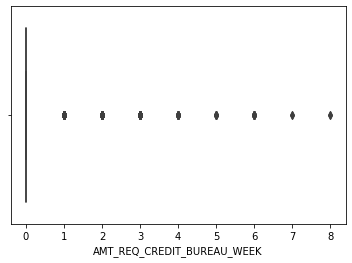

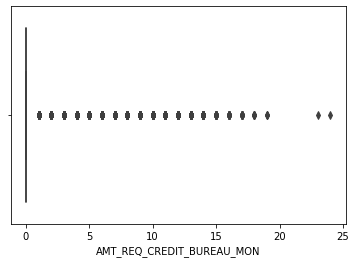

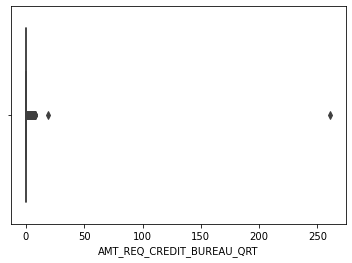

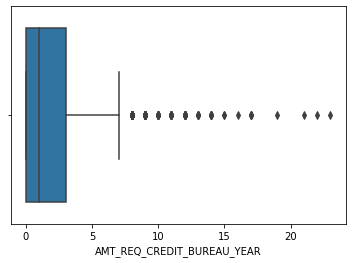

In [19]:
for c in currNumFeaturesList:
    plt.figure()
    sns.boxplot(x=curr[c])
    plt.show()

#### yes their are outliers in data but I will keep this data as it withoutremoving the ouliers reasone is this is financical & if i try to fill this outlier with other aggregation then it will affect the actual data second is, if i delet outlier then huge chunk of data will be remove so i think this is not the appropricate apporoch also most of data in 0 and 1 so in data like this there is always be the possibility to have a outlier in data so by keeping all aspect in consideration i will keep data as it is

# Identify if there is data imbalance in the data. Find the ratio of data imbalance.

#### To verify is given data is inbalance or not i will check the type of loan in data and their diffrence, bcz as we know that loan is totally base on your income source so i will check that info first

In [20]:
curr.NAME_CONTRACT_TYPE.unique()

array(['Cash loans', 'Revolving loans'], dtype=object)

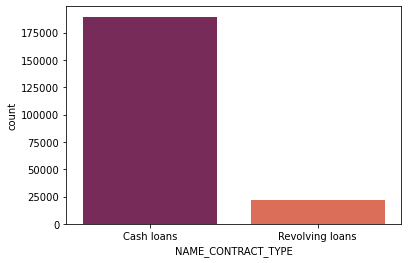

In [21]:
sns.countplot(curr.NAME_CONTRACT_TYPE,palette='rocket')
plt.show()

In [22]:
data=curr.copy()

data['type_loan']=(data.NAME_CONTRACT_TYPE=='Cash loans').astype(int)
cashLoan=len(data[data['type_loan']==1])
notCashLoan=len(data[data['type_loan']==0])

ratioOfCashLoan = (cashLoan/(cashLoan+notCashLoan))*100
ratioOfnotCashLoan = (notCashLoan/(cashLoan+notCashLoan))*100

print('Total number of cash Loan:                        ',cashLoan)
print('TOtal number of other Loan:                       ',notCashLoan)
print('Percentage Of Cash Loan in total data :           ',ratioOfCashLoan)
print("Percentage Of other than cash Loan in total data: ",ratioOfnotCashLoan)

Total number of cash Loan:                         189432
TOtal number of other Loan:                        21686
Percentage Of Cash Loan in total data :            89.72801940147215
Percentage Of other than cash Loan in total data:  10.271980598527836


####     So, above info shows that provided data is totally inbalance data 

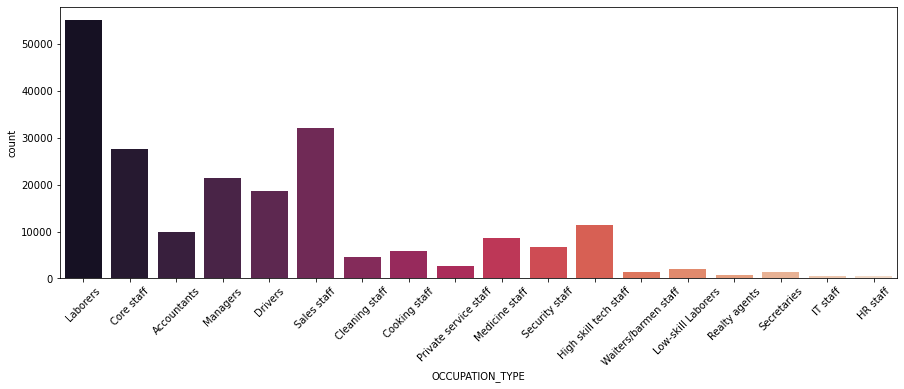

In [23]:
plt.figure(figsize=(15,5))
sns.countplot(data.OCCUPATION_TYPE,palette='rocket')
plt.xticks(rotation=45)
plt.show()

In [24]:
data['type_of_customer']=(data.OCCUPATION_TYPE=='Laborers').astype(int)
yes=len(data[data['type_of_customer']==1])
no=len(data[data['type_of_customer']==0])

Ryes = (yes/(yes+no))*100
Rno = (no/(yes+no))*100

print('number of labore customers:                             ',yes)
print('number of other customers:                              ',no)
print('Percentage Of number of labore customers in total data: ',Ryes)
print("Percentage Of number of other customers in total data:  " ,Rno)

number of labore customers:                              55186
number of other customers:                               155932
Percentage Of number of labore customers in total data:  26.139883856421527
Percentage Of number of other customers in total data:   73.86011614357847


#### if we check the number of cash loans in data then it is nearly 90% but if we check the type people who get cash salary(normally only labors got salary in cash i took labore as data point) then we will see diffrence in that too.

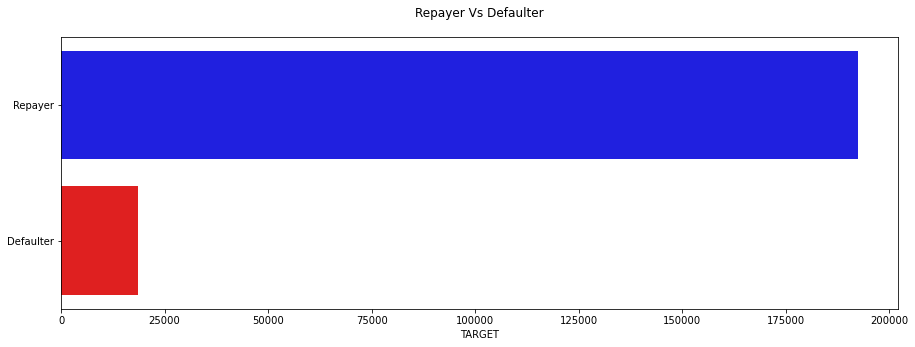

In [34]:
plt.figure(figsize=(15,5))
sns.barplot(y=["Repayer","Defaulter"], x = curr["TARGET"].value_counts(), palette = ["blue","r"],orient="h")
plt.title("Repayer Vs Defaulter", pad = 20)
plt.show()

## DATA SET 2

In [25]:
pre.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [27]:
pre.isnull().sum()/len(pre)*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [28]:
null_counts = pre.isnull().sum()
null_percentages = null_counts / len(pre)

# Select the columns with less than 50% null values
cols_to_keep = null_percentages[null_percentages < 0.5]

# Drop the columns with more than 50% null values
pre = pre.drop(labels=null_percentages[null_percentages >= 0.5].index, axis=1)

In [35]:
pre['AMT_ANNUITY'].fillna(pre['AMT_ANNUITY'].median(),inplace = True)
pre['AMT_GOODS_PRICE'].fillna(pre['AMT_GOODS_PRICE'].mode()[0], inplace=True)
pre['CNT_PAYMENT'].fillna(0,inplace = True)

In [48]:
curr.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE

# Explain the results of univariate, segmented univariate, bivariate analysis, etc. in business terms.

In [49]:
curr.describe()[['TARGET','CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE','CNT_FAM_MEMBERS']]

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,CNT_FAM_MEMBERS
count,211118.000000,211118.000000,2.111180e+05,2.111180e+05,211118.000000,2.111180e+05,211118.000000
mean,0.087851,0.502927,1.757737e+05,6.103014e+05,27793.124191,5.481697e+05,2.260707
std,0.283079,0.764364,2.751421e+05,4.057509e+05,14621.719713,3.721522e+05,0.941193
min,0.000000,0.000000,2.565000e+04,4.500000e+04,1980.000000,4.050000e+04,1.000000
25%,0.000000,0.000000,1.125000e+05,2.779695e+05,17077.500000,2.475000e+05,2.000000
50%,0.000000,0.000000,1.575000e+05,5.212800e+05,25839.000000,4.500000e+05,2.000000
75%,0.000000,1.000000,2.115000e+05,8.248230e+05,35584.875000,6.885000e+05,3.000000
max,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,20.000000


In [91]:
list_of_category=['NAME_CONTRACT_TYPE',
    'CODE_GENDER','FLAG_OWN_REALTY',
    'NAME_HOUSING_TYPE','NAME_FAMILY_STATUS','NAME_EDUCATION_TYPE',
    'NAME_INCOME_TYPE','REGION_RATING_CLIENT','CNT_FAM_MEMBERS','CNT_CHILDREN']

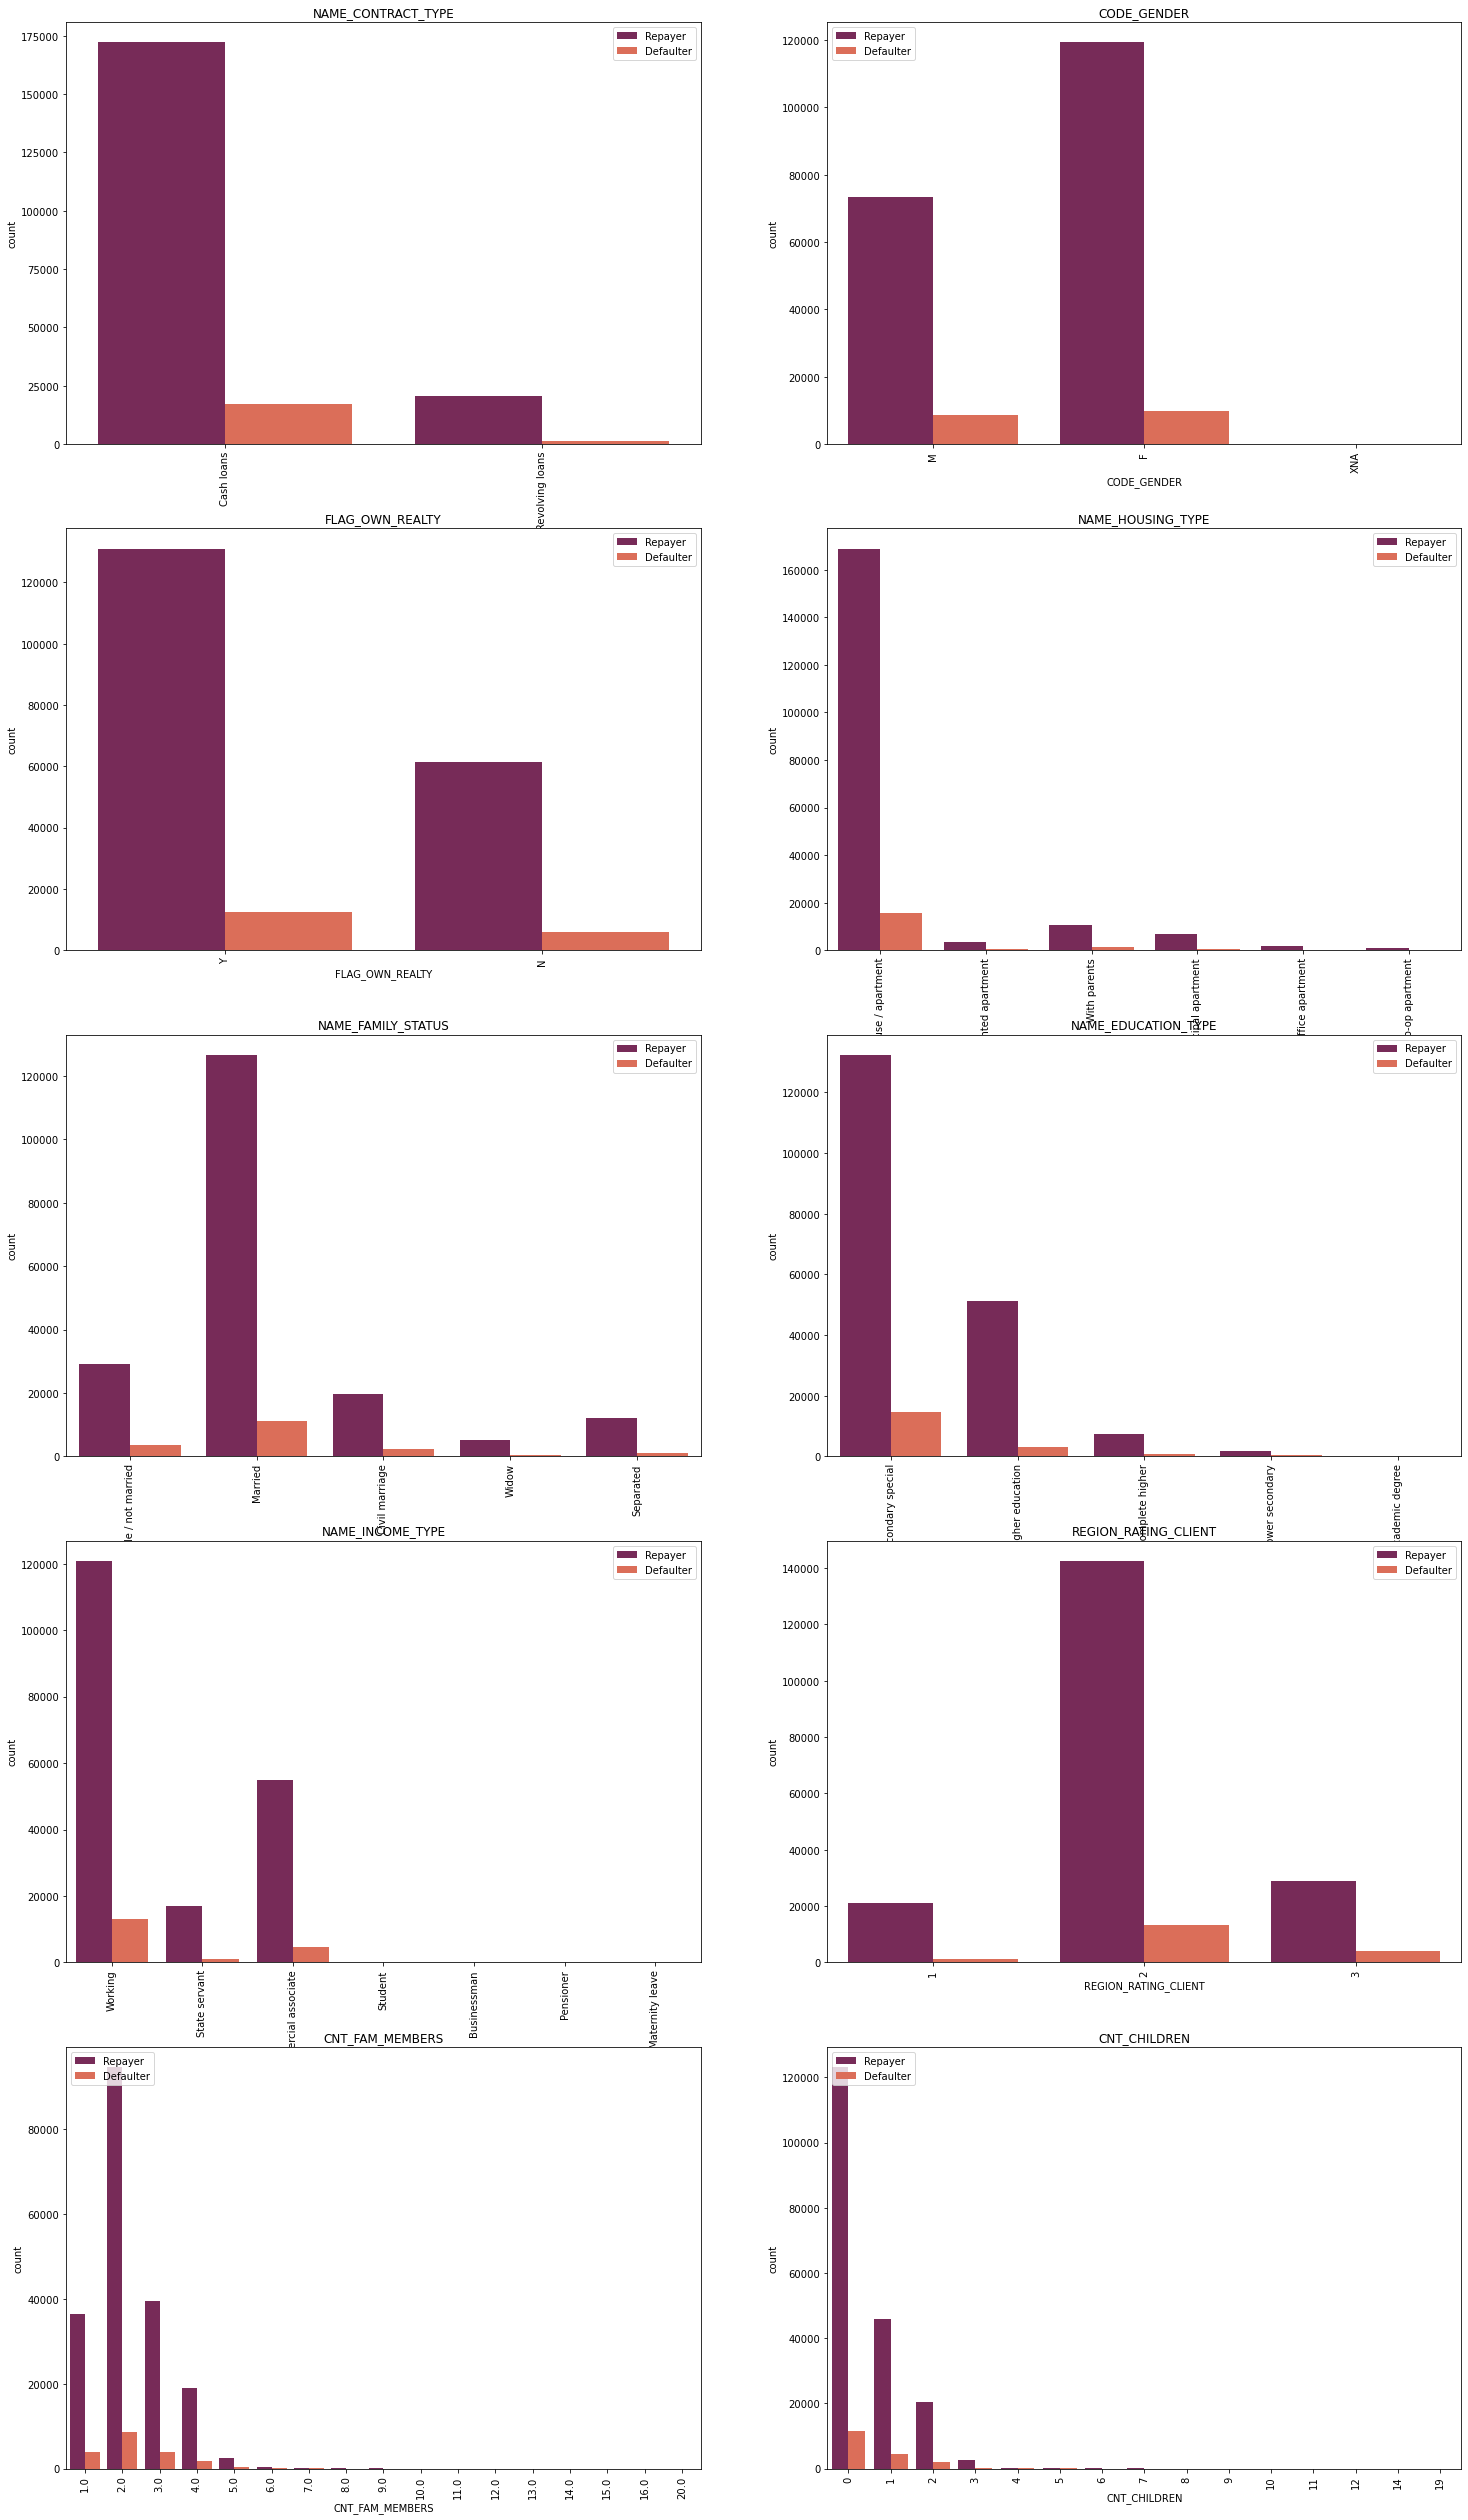

In [109]:
plt.figure(figsize=(25,45))
import itertools
for i,j in itertools.zip_longest(list_of_category,range(len(list_of_category))):
    plt.subplot(5,2,j+1)
    ax=sns.countplot(x=curr[i], hue=curr['TARGET'],palette='rocket')
    plt.legend(['Repayer','Defaulter'])
    plt.xticks(rotation=90)
    plt.title(i)
    

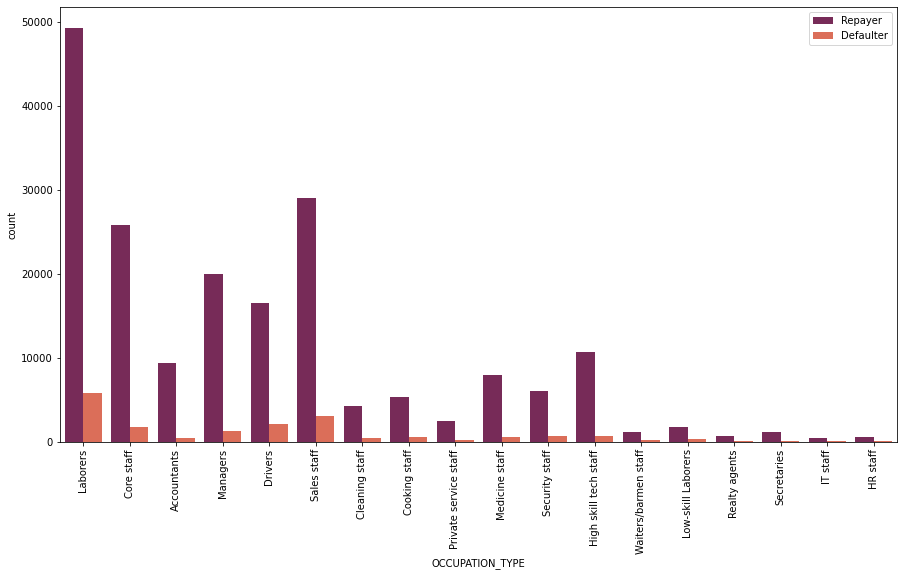

In [112]:
plt.figure(figsize=(15,8))
sns.countplot(x=curr['OCCUPATION_TYPE'], hue=curr['TARGET'],palette='rocket')
plt.legend(['Repayer','Defaulter'])
plt.xticks(rotation=90)
plt.show()

In [117]:
curr.groupby('NAME_INCOME_TYPE')['AMT_INCOME_TOTAL'].describe()

,count,mean,std,min,25%,50%,75%,max
NAME_INCOME_TYPE,,,,,,,,
Businessman,8.0,720000.000000,687526.622861,180000.0,213750.0,562500.0,900000.0,2250000.0
Commercial associate,59318.0,202287.964231,122932.252177,26550.0,135000.0,180000.0,225000.0,3950059.5
Maternity leave,4.0,85500.000000,36925.600875,49500.0,63000.0,78750.0,101250.0,135000.0
Pensioner,5.0,127800.000000,27666.767068,94500.0,103500.0,135000.0,148500.0,157500.0
State servant,17916.0,179041.042683,98317.433093,27000.0,112500.0,157500.0,225000.0,3150000.0
Student,13.0,186576.923077,121452.982356,90000.0,112500.0,171000.0,180000.0,562500.0
Working,133854.0,163557.438413,333022.819764,25650.0,112500.0,135000.0,202500.0,117000000.0


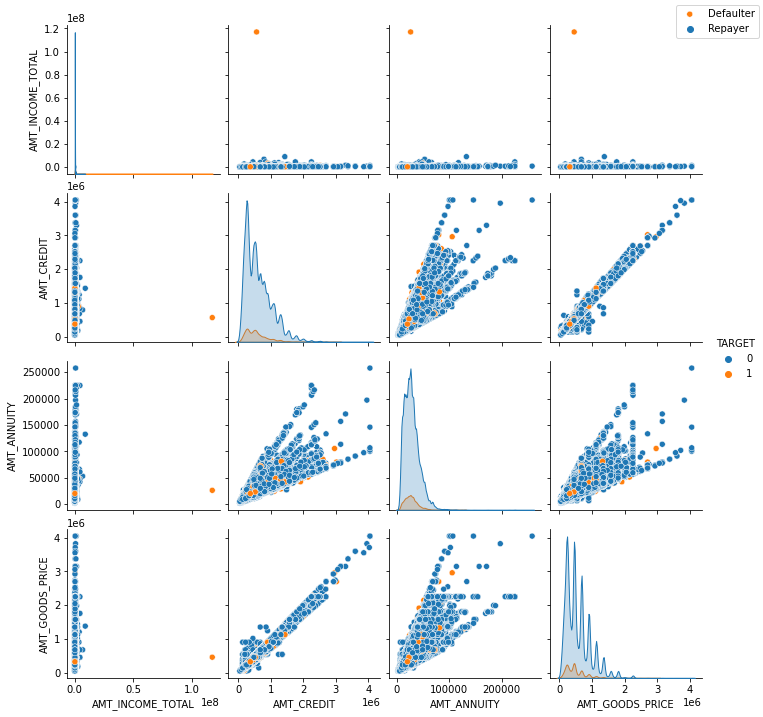

In [120]:
value = curr[[ 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE','TARGET']]
value = value[(value["AMT_GOODS_PRICE"].notnull()) & (value["AMT_ANNUITY"].notnull())]

ax= sns.pairplot(value,hue="TARGET")
ax.fig.legend(labels=['Defaulter','Repayer'])
plt.show()